# Linear Regression
## Mini-Tutorial with Scikit Learn

## 1. Background

Linear regression is widely used in order to make predictions about continuous variables. 
An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In general, in Machine Learning we think of datasets as being composed of data (or features/predictors) (X), and a target (Y).

Our goal is to "learn" a function that predicts y from the observed data x.

In the case of linear regression, the function is a simple linear function of the predictors:

\begin{equation*}
Y=f(x)=\beta X + \epsilon
\end{equation*}

The features $X$ describe $Y$ through function $f(x)$, where
$\beta $ are the coefficients (or weights) and $\epsilon$ is the error term.

Our job is simply to find the best estimates for $\beta$.
[Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) is a common method to find the $\beta $ that best minimize the residual sum of squares between the observed responses in the dataset.

A more detailed discussion of linear regression can be found [here](https://en.wikipedia.org/wiki/Linear_regression).


## 2. Simple Example: Linear Regression with a single feature

This example uses linear regression to fit a model for the `diabetes` dataset in sklearn. 
In simple terms, it attempts to fit a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset. 

We first use the example of a single predictor (feature), and then extend to a model with multiple predictors (features).

The coefficients, residual sum of squares, and the variance scores are also
calculated.

First let's explore the diabetes dataset.



In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) #format to print only to 3 dec places

print("First 10 examples: \n")
print("Data: ", diabetes.data[1:10])
print("Target: ", diabetes.target[1:10], "\n")

print ("Data shape = ",diabetes.data.shape)
print ("Target shape = ",diabetes.target.shape)

First 10 examples: 

Data:  [[-0.002 -0.045 -0.051 -0.026 -0.008 -0.019 0.074 -0.039 -0.068 -0.092]
 [0.085 0.051 0.044 -0.006 -0.046 -0.034 -0.032 -0.003 0.003 -0.026]
 [-0.089 -0.045 -0.012 -0.037 0.012 0.025 -0.036 0.034 0.023 -0.009]
 [0.005 -0.045 -0.036 0.022 0.004 0.016 0.008 -0.003 -0.032 -0.047]
 [-0.093 -0.045 -0.041 -0.019 -0.069 -0.079 0.041 -0.076 -0.041 -0.096]
 [-0.045 0.051 -0.047 -0.016 -0.040 -0.025 0.001 -0.039 -0.063 -0.038]
 [0.064 0.051 -0.002 0.067 0.091 0.109 0.023 0.018 -0.036 0.003]
 [0.042 0.051 0.062 -0.040 -0.014 0.006 -0.029 -0.003 -0.015 0.011]
 [-0.071 -0.045 0.039 -0.033 -0.013 -0.035 -0.025 -0.003 0.068 -0.014]]
Target:  [75.000 141.000 206.000 135.000 97.000 138.000 63.000 110.000 310.000] 

Data shape =  (442, 10)
Target shape =  (442,)


The data contains 442 samples with 10 features.

## Feature Selection

In [97]:
# Let's first use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] # choose third feature only

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] # everything except last 20 items
diabetes_X_test = diabetes_X[-20:]  # only last 20 items

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20] # everything except last 20 items
diabetes_y_test = diabetes.target[-20:]  # only last 20 items

## Create and train the model

In [98]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_train) - diabetes_y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_train, diabetes_y_train))

Coefficients: 
 [938.238]
Mean squared error: 3955.02
Variance score: 0.34


## Test the model on the data it hasn't seen

In [100]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.238]
Mean squared error: 2548.07
Variance score: 0.47


## Visualize Results of Model

Predicted values: 
 [225.973 115.748 163.276 114.736 120.804 158.220 236.086 121.815 99.568
 123.838 204.737 96.534 154.175 130.916 83.388 171.366 137.995 137.995
 189.568 84.399]

Ground truth: 
 [233.000 91.000 111.000 152.000 120.000 67.000 310.000 94.000 183.000
 66.000 173.000 72.000 49.000 64.000 48.000 178.000 104.000 132.000 220.000
 57.000]


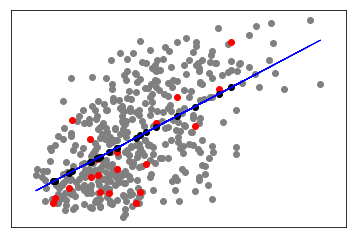

In [108]:
# make new prediction from model

print("Predicted values: \n",regr.predict(diabetes_X_test))
print("\nGround truth: \n",diabetes_y_test)
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='gray') # plot train data
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red') # plot test data
#plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
#         linewidth=1) # plot fit line
plt.plot(diabetes_X_train, regr.coef_ * diabetes_X_train + regr.intercept_, color='blue', linewidth=1)


plt.scatter(diabetes_X_test, regr.predict(diabetes_X_test),  color='black') # plot test data

plt.xticks(())
plt.yticks(())
plt.show()

Gray dots =  training data

Red dots = testing data

Black dots = model prediction on test data

Blue line = prediction model (linear fit)

## 3. Model using multiple features (predictors).

In [87]:
# Now let's use all features available
diabetes_X = diabetes.data[:, np.newaxis, :] # take all features 

# Split the data into training/testing sets
diabetes_X_train = diabetes.data[:-20] # everything except last 20 items
diabetes_X_test = diabetes.data[-20:]  # only last 20 items

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20] # everything except last 20 items
diabetes_y_test = diabetes.target[-20:]  # only last 20 items

In [88]:
# Create linear regression object
full_regr = linear_model.LinearRegression()

# Train the model using the training sets
full_regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Create and train the multiple features model

In [80]:
# The coefficients
print('Coefficients: \n', full_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((full_regr.predict(diabetes_X_train) - diabetes_y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % full_regr.score(diabetes_X_train, diabetes_y_train))

Coefficients: 
 [0.303 -237.639 510.531 327.737 -814.132 492.815 102.848 184.606 743.520
 76.095]
Mean squared error: 2901.56
Variance score: 0.51


In [81]:
# The coefficients
print('Coefficients: \n', full_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((full_regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % full_regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [0.303 -237.639 510.531 327.737 -814.132 492.815 102.848 184.606 743.520
 76.095]
Mean squared error: 2004.57
Variance score: 0.59


As expected the error decreases as more predictors are taken into account, the variance score increases as the model captures more of the variance.